# Análisis de Datos Juegos Olímpicos

## Importación de librerías

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_style("darkgrid")

## Lectura de los archivos del dataset

In [2]:
summer_olympics_df = pd.read_csv("data/summer_olympics.csv")
summer_olympics_df.drop(columns=summer_olympics_df.columns[0], axis=1, inplace=True)
summer_olympics_df.head()

,Name,Sex,Age,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,A Dijiang,M,24.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,A Lamusi,M,23.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,Gunnar Nielsen Aaby,M,24.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,Edgar Lindenau Aabye,M,34.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN


In [3]:
noc_df = pd.read_csv("data/noc_regions.csv")
noc_df.drop(columns="notes", axis=1, inplace=True)
noc_df.head()

,NOC,region
0,AFG,Afghanistan
1,AHO,Curacao
2,ALB,Albania
3,ALG,Algeria
4,AND,Andorra


### Unión de los datasets

In [4]:
data = summer_olympics_df.merge(noc_df, how='inner', on='NOC')
data.head()

,Name,Sex,Age,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
0,A Dijiang,M,24.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China
1,A Lamusi,M,23.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China
2,Gunnar Nielsen Aaby,M,24.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark
3,Edgar Lindenau Aabye,M,34.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
4,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands


## Exploración de datos

In [5]:
data.shape

(236692, 13)

In [6]:
data["City"].unique()

array(['Barcelona', 'London', 'Antwerpen', 'Paris', 'Los Angeles',
       'Helsinki', 'Sydney', 'Atlanta', 'Stockholm', 'Beijing',
       'Rio de Janeiro', 'Athina', 'Mexico City', 'Munich', 'Seoul',
       'Berlin', 'Melbourne', 'Roma', 'Amsterdam', 'Montreal', 'Moskva',
       'Tokyo', 'St. Louis'], dtype=object)

In [7]:
data["Year"].unique()

array([1992, 2012, 1920, 1900, 1932, 1952, 2000, 1996, 1912, 1924, 1948,
       2008, 2016, 2004, 1984, 1968, 1972, 1988, 1936, 1956, 1960, 1928,
       1976, 1980, 1964, 1906, 1904, 1908, 1896, 2020], dtype=int64)

In [8]:
data["Season"].unique()

array(['Summer'], dtype=object)

### Valores nulos

In [9]:
data.isna().sum()

Name           0
Sex            0
Age         9177
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     200313
region        23
dtype: int64

#### Imputación de valores nulos en la edad

In [10]:
data["Age"] = data["Age"].fillna(data["Age"].mean())
data.isna().sum()

Name           0
Sex            0
Age            0
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     200313
region        23
dtype: int64

In [11]:
data["Age"] = data["Age"].round(0)

### Edad de los atletas participantes

In [12]:
athletes_age = data.drop_duplicates(subset=["Year", "Name"])[["Name", "Age"]].reset_index(drop=True)
athletes_age = athletes_age.groupby("Age")["Name"].count().sort_values(ascending = False).head(30).reset_index()

athletes_age

,Age,Name
0,26.0,18196
1,23.0,13690
2,24.0,13469
3,22.0,12903
4,25.0,12773
5,21.0,11435
6,27.0,10671
7,28.0,9305
8,20.0,8769
9,29.0,7816


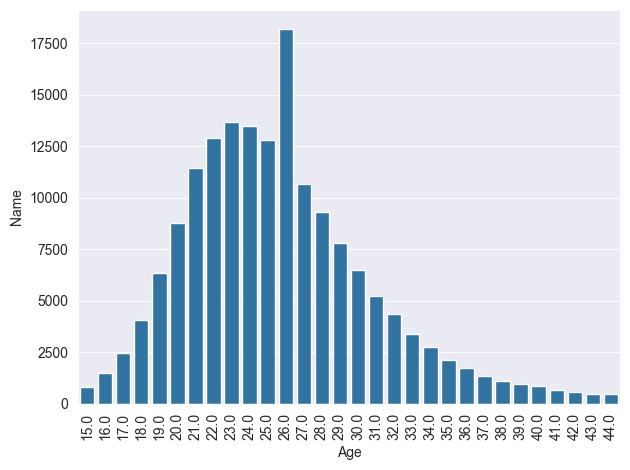

In [13]:
plot = sns.barplot(data=athletes_age, x="Age", y="Name")

plt.xticks(rotation=90)
plt.tight_layout()

### Atletas por año y género

In [15]:
athletes = data.drop_duplicates(subset=["Year", "Name"])[["Year", "Name", "Sex"]].reset_index(drop=True)
athletes = athletes.groupby(["Year", "Sex"]).count().reset_index().rename(columns={"Name": "Number of Athletes"})
athletes

,Year,Sex,Number of Athletes
0,1896,M,176
1,1900,F,23
2,1900,M,1197
3,1904,F,6
4,1904,M,644
5,1906,F,6
6,1906,M,835
7,1908,F,44
8,1908,M,1980
9,1912,F,53


[Text(0.5, 1.0, 'Summer Olympics Athletes by Year and Gender')]

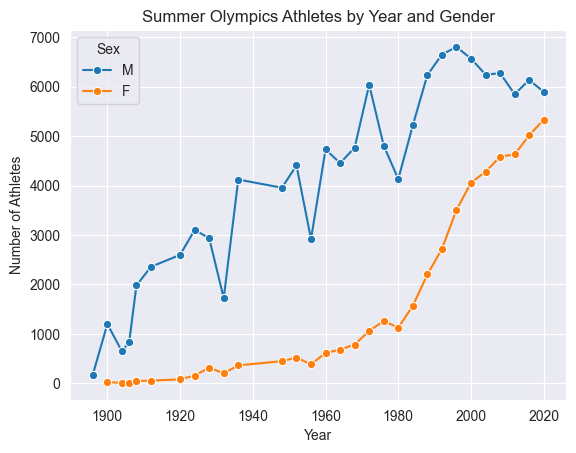

In [16]:
sns.lineplot(data=athletes, x="Year", y="Number of Athletes", hue="Sex", marker="o").set(title="Summer Olympics Athletes by Year and Gender")

### Cantidad de países participantes por año

In [17]:
countries = data.groupby(data["Year"])["NOC"].nunique().reset_index().rename(columns={"NOC": "Number of Countries"})
countries

,Year,Number of Countries
0,1896,12
1,1900,31
2,1904,15
3,1906,21
4,1908,22
5,1912,29
6,1920,29
7,1924,45
8,1928,46
9,1932,47


[Text(0.5, 1.0, 'Summer Olympics Countries by Year')]

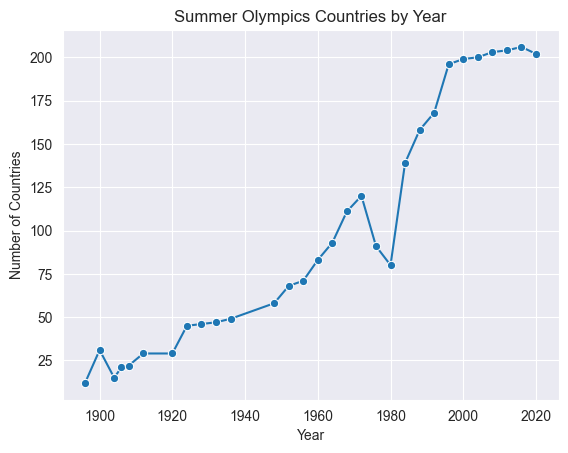

In [18]:
sns.lineplot(data=countries, x="Year", y="Number of Countries", marker="o").set(title="Summer Olympics Countries by Year")

### Cantidad de medallas por país y año

In [20]:
medals = data[["Year", "NOC", "Medal", "region"]].reset_index(drop=True)
medals = medals.groupby(["Year", "NOC", "Medal", "region"]).size().reset_index()
medals

,Year,NOC,Medal,region,0
0,1896,AUS,Bronze,Australia,1
1,1896,AUS,Gold,Australia,2
2,1896,AUT,Bronze,Austria,2
3,1896,AUT,Gold,Austria,2
4,1896,AUT,Silver,Austria,1
...,...,...,...,...,...
3007,2020,USA,Silver,USA,110
3008,2020,UZB,Bronze,Uzbekistan,2
3009,2020,UZB,Gold,Uzbekistan,3
3010,2020,VEN,Gold,Venezuela,1


### Cantidad de medallas por país

In [ ]:
countries_medals = data.drop_duplicates(subset=["Year", "NOC", "Event", "Medal"])[["Year", "NOC", "Event", "Medal", "region"]].reset_index(drop=True)
countries_medals = countries_medals.groupby(["region"])["Medal"].count().sort_values(ascending=False).reset_index()
countries_medals

In [ ]:
countries_medals.head(10)

In [ ]:
sns.barplot(data=countries_medals.head(10), y="region", x="Medal", orient="h")

### Edad de los atletas medallistas en los juegos del 2020

In [ ]:
athletes_age_2020 = data[data["Year"] = 2020]
athletes_age_2020 = athletes_age_2020.drop_duplicates(subset=["Name"])
athletes_age_2020 = athletes_age_2020.groupby("Age")["Medal"].count().sort_values(ascending = False).head(30).reset_index()
athletes_age_2020

In [ ]:
plot = sns.barplot(data=athletes_age_2020, x="Age", y="Medal")

plt.xticks(rotation=90)
plt.tight_layout()

### Atletas medallistas olímpicos (Top 10)

In [ ]:
athletes_medals = data.groupby(["Name"])["Medal"].count().sort_values(ascending=False).reset_index()
athletes_medals

In [ ]:
athletes_medals.head(10)

In [ ]:
sns.barplot(data=athletes_medals.head(10), y="Name", x="Medal", orient="h")

### Medallistas olímpicos colombianos

In [ ]:
medals_col = data[(data["NOC"] == "COL") & (data["Medal"].notna())].sort_values(by="Year").reset_index()
medals_col